## Precision-recall curve for interactome clustering

This notebook calculates the precision-recall curve in Figure S4B.

In [6]:
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../../scripts/')
sys.path.append('../../scripts/interactome_precision_recall')
import precision_recall
from pyseus import validation_analysis

### Import datasets

We import the table of all OpenCell hits along with ground truth datasets. 

The hits table (`'mass_spec_enrichment_pvals_20211001.csv'`) is too large to host on GitHub; it is available for download on Figshare [here](https://figshare.com/s/4135b44bf323ee479b1d).

In [ ]:
data_root = pathlib.Path('../../data')

all_hits = pd.read_csv(data_root / 'figshare' / 'mass_spec_enrichment_pvals_20211001.csv')
corum = pd.read_csv(data_root / 'external' / 'corum_unique_interactions.csv')
localizations = pd.read_excel(data_root / 'external' / 'hela_localization.xlsx', engine='openpyxl')

In [9]:
# start a Pyseus Validations class that contains dynamic FDR caluclation method
alpha12 = validation_analysis.Validation(
    hit_table=all_hits, 
    target_col='target', 
    prey_col='prey',
    corum=corum, 
    localization_table=localizations
)

# calculate dynamic fdr at alpha of 0.12
alpha12.dynamic_fdr(perc=12)

# Calculate precision and recall with this set
alpha12.colocalization_precision()
alpha12.corum_interaction_coverage()

a12_precision, a12_recall = alpha12.precision, alpha12.recall

### Create precision-recall curve

Next we create a precision-recall curve by calculating precision and recall at different sets of FDR thresholds (these thresholds are used to define significant interactors). 

In [10]:
pr_table = precision_recall.precision_recall_curve(
    all_hits, 
    target_col='target', 
    prey_col='prey', 
    corum=corum,
    helas=localizations, 
    thresholds=None
)

Text(0, 0.5, 'precision (broad co-localization')

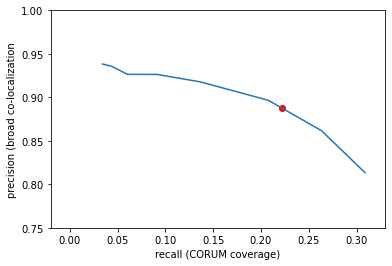

In [11]:
fig, ax = plt.subplots()
ax.plot(pr_table['recall'], pr_table['precision'])
ax.scatter(a12_recall, a12_precision, color='red')
ax.set_ylim(0.75, 1)
ax.set_xlim(-.02, .33)

ax.set_xlabel('recall (CORUM coverage)')
ax.set_ylabel('precision (broad co-localization')